In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
# Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import dame_flame
import random
import matplotlib.pyplot as plt

In [4]:
# LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_2022-03-22.csv")
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [5]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [6]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [7]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [8]:
sap["SAP"] = np.where(sap["Study_Card"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1


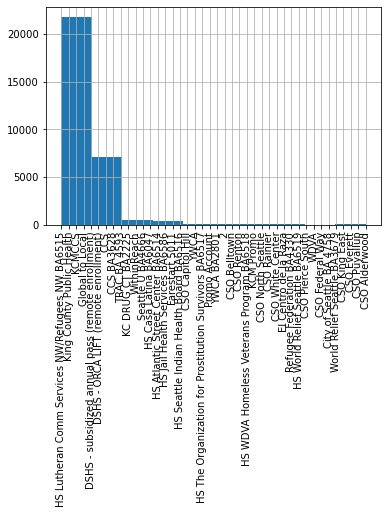

In [9]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [10]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [11]:
# Agency is the condensed version of CardIssuingAgency.
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment)
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment)


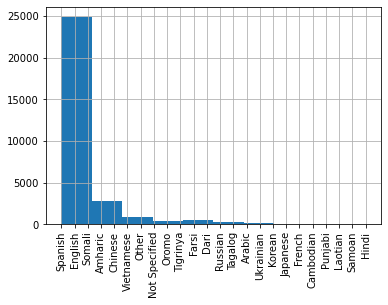

In [12]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [13]:
sap["LanguageSpoken"].value_counts()

English          23190
Chinese           2546
Spanish           1582
Dari               423
Vietnamese         418
Other              401
Russian            228
Amharic            205
Not Specified      200
Tigrinya           134
Ukrainian           85
Somali              79
Farsi               67
Korean              66
French              48
Arabic              47
Tagalog             41
Cambodian           21
Oromo               15
Punjabi             13
Japanese             7
Hindi                5
Laotian              3
Samoan               3
Name: LanguageSpoken, dtype: int64

In [14]:
top10 = sap.value_counts("LanguageSpoken").index[:5]
top10.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Vietnamese']

In [15]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top10 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other,Spanish
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health,English
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health,English
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS,English
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health,English
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health,English
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English


In [16]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [17]:
# bin all continuous variables.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# I use one hot encoding for features with more than one category (ie 'RaceDesc','LanguageSpoken', 'CardIssuingAgency')
prep_data = sap[['RaceDesc','Language']] # someone might register a second time at another Card Issuing Agency.
# prep_data
prep_data=pd.get_dummies(prep_data)
prep_data

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,Language_Chinese,Language_Dari,Language_English,Language_Other,Language_Spanish,Language_Vietnamese
11,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
18,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
26,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
54,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112521,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112522,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112523,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [18]:
sap # 4.7: 29878 rows

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,...,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,stage,Age_bin
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,...,3,1,1,2,0,Other,Spanish,51694,3,2
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,74266,2,3
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,100890,3,4
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,...,3,1,1,2,0,KCMCCS,English,159642,2,4
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,...,3,1,1,2,0,King County Public Health,English,165186,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,...,1,1,1,1,1,King County Public Health,English,270140,1,2
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,...,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,1,2
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,...,4,3,3,4,0,King County Public Health,English,270632,1,2
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,...,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,1,2


In [55]:
# join with one hot encodings for features with more than one category
# sap = sap.merge(prep_data,left_index=True, right_index=True,how='left')
# sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,...,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,Language_Chinese,Language_Dari,Language_English,Language_Other,Language_Spanish,Language_Vietnamese
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,...,0,0,0,0,0,0,0,0,1,0
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,...,0,0,0,1,0,0,1,0,0,0
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,...,0,0,0,1,0,0,1,0,0,0
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,...,0,0,0,1,0,0,1,0,0,0


In [19]:
sap.columns

Index(['Unnamed:_0', 'Age', 'RaceDesc', 'LanguageSpoken', 'Expiration',
       'DateIssued', 'CardIssuingAgency', 'GEOID', 'Initial_Load',
       'Study_Card', 'card_id', 'OverallJobAccess_D', 'lowwagelaborforce_D',
       'Access30Transit_D', 'Access30Transit_ts_D', 'spatialmismatch_D', 'SAP',
       'Agency', 'Language', 'user_id', 'stage', 'Age_bin'],
      dtype='object')

In [20]:
sap = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,stage,Age_bin
11,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,3,2
18,White,4,3,1,1,2,0,King County Public Health,English,74266,2,3
26,White,4,3,1,1,2,0,King County Public Health,English,100890,3,4
50,White,4,3,1,1,2,0,KCMCCS,English,159642,2,4
54,White,4,3,1,1,2,0,King County Public Health,English,165186,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
112520,White,2,1,1,1,1,1,King County Public Health,English,270140,1,2
112521,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,1,2
112522,White,3,4,3,3,4,0,King County Public Health,English,270632,1,2
112523,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,1,2


In [21]:
sap["SAP"].value_counts()

0    18653
1    11225
Name: SAP, dtype: int64

In [22]:
11225/18653

0.6017798745510106

In [23]:
sap["stage"] = sap["stage"].astype(int)
count_enroll = sap.groupby(["user_id"]).count()[['stage']]
count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

In [24]:
sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows

sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [25]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

## EDA of Enrollment vs. Covariates

In [26]:
#RACE
race_plt =  sap_enrollment.groupby(['RaceDesc'],as_index=False).count_enroll.mean()
print(race_plt)
race_plt['RaceDesc'] = race_plt['RaceDesc'].astype(str)

                                    RaceDesc  count_enroll
0           American Indian or Alaska Native      1.281461
1                                      Asian      1.508305
2                  Black or African American      1.283484
3                         Hispanic or Latino      1.135192
4                               Multi-Racial      1.219638
5  Native Hawaiian or Other Pacific Islander      1.197674
6                              Not Specified      1.227073
7                                      Other      1.185230
8                                      White      1.230155


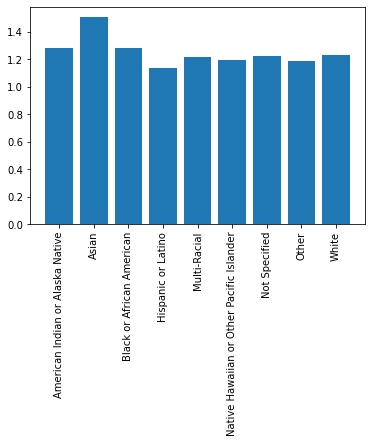

In [27]:
import matplotlib.pyplot as plt
plt.bar(race_plt["RaceDesc"], race_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.xticks(rotation=90)
plt.show()

In [28]:
#AGE
age_plt =  sap_enrollment.groupby(['Age_bin'],as_index=False).count_enroll.mean()
print(age_plt)
age_plt['Age_bin'] = age_plt['Age_bin'].astype(str)

  Age_bin  count_enroll
0       0      1.100024
1       1      1.152232
2       2      1.197168
3       3      1.288186
4       4      1.325796
5       5      1.692612


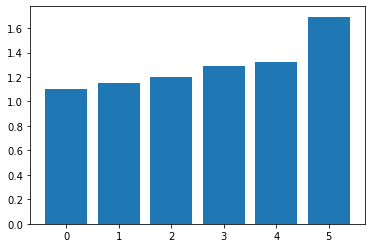

In [29]:
plt.bar(age_plt['Age_bin'], age_plt["count_enroll"], width=0.8, bottom=None, align='center', data=age_plt)
plt.show()

In [30]:
# Language
language_plt =  sap_enrollment.groupby(['LanguageSpoken'],as_index=False).count_enroll.mean()
# print(language_plt)

KeyError: 'LanguageSpoken'

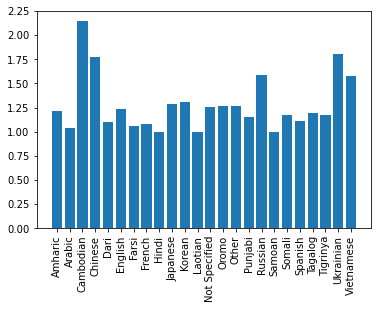

In [28]:
plt.bar(language_plt["LanguageSpoken"], language_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.xticks(rotation=90)
plt.show()

   spatialmismatch_D  count_enroll
0                  1      1.285155
1                  2      1.325722
2                  3      1.275297
3                  4      1.230540


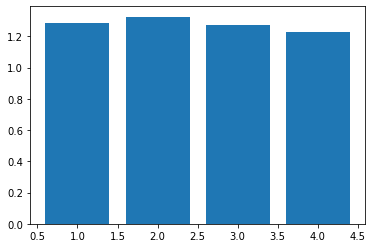

In [29]:
# Spatial Mismatch
sm_plt =  sap_enrollment.groupby(['spatialmismatch_D'],as_index=False).count_enroll.mean()
print(sm_plt)

plt.bar(sm_plt["spatialmismatch_D"], sm_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

   Access30Transit_D  count_enroll
0                  1      1.163686
1                  2      1.214806
2                  3      1.236267
3                  4      1.333854


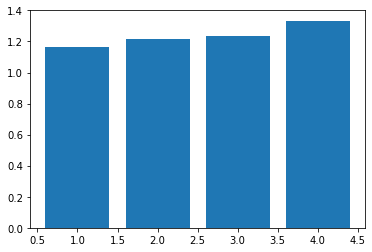

In [30]:
# access to transit
accesstransit_plt =  sap_enrollment.groupby(['Access30Transit_D'],as_index=False).count_enroll.mean()
print(accesstransit_plt)

plt.bar(accesstransit_plt["Access30Transit_D"], accesstransit_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

   OverallJobAccess_D  count_enroll
0                   1      1.204683
1                   2      1.215106
2                   3      1.208903
3                   4      1.336403


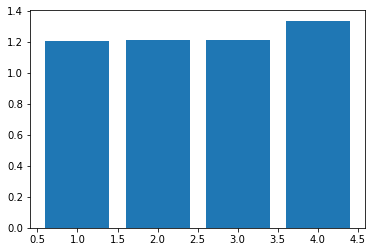

In [31]:
# Overall Job Access
ja_plt =  sap_enrollment.groupby(['OverallJobAccess_D'],as_index=False).count_enroll.mean()
print(ja_plt)
plt.bar(ja_plt["OverallJobAccess_D"], ja_plt["count_enroll"], width=0.8, bottom=None, align='center')
plt.show()

In [31]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration'])]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [83]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,user_id,Age_bin,Agency,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Spanish,51694,2,Other,1
1,White,4,3,1,1,2,0,English,74266,3,King County Public Health,1
2,White,4,3,1,1,2,0,English,100890,4,King County Public Health,1
3,White,4,3,1,1,2,0,English,159642,4,KCMCCS,1
4,White,4,3,1,1,2,0,English,165186,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,English,270140,2,King County Public Health,1
29874,White,1,4,1,1,4,0,English,270468,2,DSHS - ORCA LIFT (remote enrollment),1
29875,White,3,4,3,3,4,0,English,270632,2,King County Public Health,1
29876,White,2,2,4,3,2,1,English,271502,2,DSHS - subsidized annual pass (remote enrollment),1


In [89]:
# There are 201 null values for bmi. We will drop these values in the cell below.
ds_general.isnull().sum() # 50 values in racedesc

RaceDesc                0
OverallJobAccess_D      0
lowwagelaborforce_D     0
Access30Transit_D       0
Access30Transit_ts_D    0
spatialmismatch_D       0
SAP                     0
Language                0
user_id                 0
Age_bin                 0
Agency                  0
count_enroll            0
dtype: int64

In [85]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,user_id,Age_bin,Agency,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Spanish,51694,2,Other,1
1,White,4,3,1,1,2,0,English,74266,3,King County Public Health,1
2,White,4,3,1,1,2,0,English,100890,4,King County Public Health,1
3,White,4,3,1,1,2,0,English,159642,4,KCMCCS,1
4,White,4,3,1,1,2,0,English,165186,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,English,270140,2,King County Public Health,1
29874,White,1,4,1,1,4,0,English,270468,2,DSHS - ORCA LIFT (remote enrollment),1
29875,White,3,4,3,3,4,0,English,270632,2,King County Public Health,1
29876,White,2,2,4,3,2,1,English,271502,2,DSHS - subsidized annual pass (remote enrollment),1


In [88]:
# 50 value of RaceDesc NA
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,user_id,Age_bin,Agency,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Spanish,51694,2,Other,1
1,White,4,3,1,1,2,0,English,74266,3,King County Public Health,1
2,White,4,3,1,1,2,0,English,100890,4,King County Public Health,1
3,White,4,3,1,1,2,0,English,159642,4,KCMCCS,1
4,White,4,3,1,1,2,0,English,165186,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,English,270140,2,King County Public Health,1
29874,White,1,4,1,1,4,0,English,270468,2,DSHS - ORCA LIFT (remote enrollment),1
29875,White,3,4,3,3,4,0,English,270632,2,King County Public Health,1
29876,White,2,2,4,3,2,1,English,271502,2,DSHS - subsidized annual pass (remote enrollment),1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count for SAP')

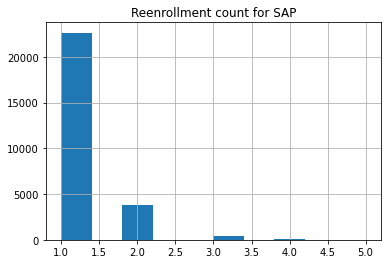

In [96]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

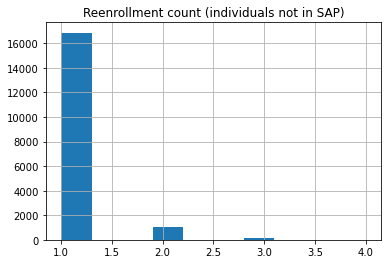

In [98]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

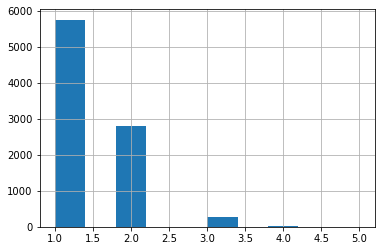

In [95]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()

In [ ]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

# FLAME

In [90]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,Age_bin,Agency,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Spanish,2,Other,1
1,White,4,3,1,1,2,0,English,3,King County Public Health,1
2,White,4,3,1,1,2,0,English,4,King County Public Health,1
3,White,4,3,1,1,2,0,English,4,KCMCCS,1
4,White,4,3,1,1,2,0,English,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,English,2,King County Public Health,1
29874,White,1,4,1,1,4,0,English,2,DSHS - ORCA LIFT (remote enrollment),1
29875,White,3,4,3,3,4,0,English,2,King County Public Health,1
29876,White,2,2,4,3,2,1,English,2,DSHS - subsidized annual pass (remote enrollment),1


In [97]:
match_all.RaceDesc.value_counts()

White                                        9278
Black or African American                    5524
Asian                                        4226
Hispanic or Latino                           2731
Not Specified                                2547
Other                                        1619
American Indian or Alaska Native              708
Multi-Racial                                  360
Native Hawaiian or Other Pacific Islander     326
Name: RaceDesc, dtype: int64

In [98]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,Age_bin,Agency,count_enroll
0,3,4,3,1,1,2,0,Spanish,2,Other,1
1,0,4,3,1,1,2,0,English,3,King County Public Health,1
2,0,4,3,1,1,2,0,English,4,King County Public Health,1
3,0,4,3,1,1,2,0,English,4,KCMCCS,1
4,0,4,3,1,1,2,0,English,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,English,2,King County Public Health,1
29874,0,1,4,1,1,4,0,English,2,DSHS - ORCA LIFT (remote enrollment),1
29875,0,3,4,3,3,4,0,English,2,King County Public Health,1
29876,0,2,2,4,3,2,1,English,2,DSHS - subsidized annual pass (remote enrollment),1


In [100]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,Age_bin,Agency,count_enroll
0,3,4,3,1,1,2,0,2,2,Other,1
1,0,4,3,1,1,2,0,0,3,King County Public Health,1
2,0,4,3,1,1,2,0,0,4,King County Public Health,1
3,0,4,3,1,1,2,0,0,4,KCMCCS,1
4,0,4,3,1,1,2,0,0,4,King County Public Health,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,0,2,King County Public Health,1
29874,0,1,4,1,1,4,0,0,2,DSHS - ORCA LIFT (remote enrollment),1
29875,0,3,4,3,3,4,0,0,2,King County Public Health,1
29876,0,2,2,4,3,2,1,0,2,DSHS - subsidized annual pass (remote enrollment),1


In [102]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Language,Age_bin,Agency,count_enroll
0,3,4,3,1,1,2,0,2,2,5,1
1,0,4,3,1,1,2,0,0,3,0,1
2,0,4,3,1,1,2,0,0,4,0,1
3,0,4,3,1,1,2,0,0,4,4,1
4,0,4,3,1,1,2,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,0,2,0,1
29874,0,1,4,1,1,4,0,0,2,1,1
29875,0,3,4,3,3,4,0,0,2,0,1
29876,0,2,2,4,3,2,1,0,2,2,1


In [103]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t = True, adaptive_weights='ridge', want_pe=True)

# binned language (many small languages were put into one category).
# changed race and language from 1 hot encodings into categorical variables.
# used decision tree for covariate importance.
# ended matching on completion of t.


In [104]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  2833
	Unmatched treated units:  2039 out of a total of  9068 treated units
	Unmatched control units:  7353 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0.42216628702897946
	Number of matches made in this iteration:  8797
	Number of matches made so far:  17927
	In this iteration, the covariates dropped are:  Agency
Iteration number:  3
	Number of matched groups formed in total:  3948
	Unmatched treated units:  675 out of a total of  9068 treated units
	Unmatched control

In [ ]:
# bin variables into larger categories.
# check which variables were matched on.
# show the exact matched groups to organizers (figure.) Number of data points in matched group (vs. treatment effect.)
# Pick out specific matched groups to show (and count of n in match group.)

In [105]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT # 0.34

0.2896139540880278

In [107]:
# For each unit, we can see the covariates it was matched on.
model_flame_AMT.df_units_and_covars_matched[:50]

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Language,Age_bin,Agency
0,*,4,3,1,1,2,*,*,*
1,0,4,3,1,1,2,0,3,0
2,0,4,3,1,1,2,0,*,*
3,0,4,3,1,1,2,0,*,*
4,0,4,3,1,1,2,0,*,*
5,*,4,3,1,1,2,*,*,*
6,3,4,3,1,1,2,0,*,*
7,3,4,3,1,1,2,0,*,*
8,3,4,3,1,1,2,0,1,*
9,2,4,3,1,1,2,0,*,*


## CATE based on RACE.

In [35]:
race = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','amt_total','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race

,SAP,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,count_enroll
0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,1,0,0,0,0,0,0,0,0,1,1
29874,0,0,0,0,0,0,0,0,0,1,1
29875,0,0,0,0,0,0,0,0,0,1,1
29876,1,0,0,0,0,0,0,0,0,1,1


In [36]:
model_flame_race = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_race.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_race = model_flame_race.predict(race)

Iteration number:  1
	Number of matched groups formed in total:  9
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  51 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  26851
	Number of matches made so far:  26851
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  10
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  0 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0.3754529965151041
	Number of matches made in this iteration:  51
	Number of matches made so far:  26902
	In this iteration, the covariates dropped are:  RaceDesc_Multi-Racial
All units have been matched.


In [37]:
# For each unit, we can see the covariates it was matched on.
model_flame_race.df_units_and_covars_matched[:10]

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0


In [38]:
groups = list(range(len(model_flame_race.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race, group[0]))
    len_group.append(len(group))

In [39]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_race.units_per_group]

[12, 9, 10, 0, 15, 19, 32, 76, 1, 15]

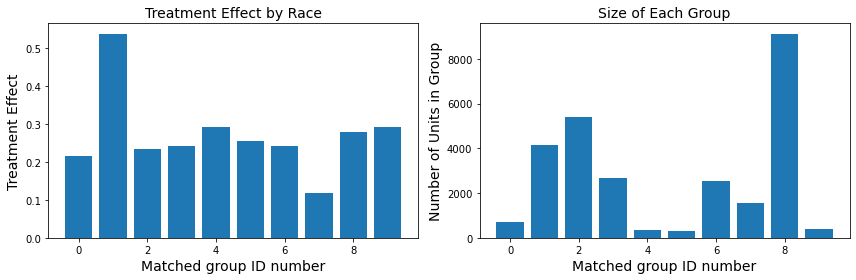

In [40]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE based on OverallJobAccess_D

In [41]:
job_access = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','OverallJobAccess_D'])]
job_access

,OverallJobAccess_D,SAP,count_enroll
0,4,0,1
1,4,0,1
2,4,0,1
3,4,0,1
4,4,0,1
...,...,...,...
29873,2,1,1
29874,1,0,1
29875,3,0,1
29876,2,1,1


In [43]:
model_flame_ja = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_ja.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_jobaccess = model_flame_ja.predict(job_access)


Iteration number:  1
	Number of matched groups formed in total:  4
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  0 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  26902
	Number of matches made so far:  26902
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [46]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_ja.units_per_group]

[13, 571, 129, 0]

In [52]:
# For each unit, we can see the covariates it was matched on.
model_flame_ja.df_units_and_covars_matched[:15]

,OverallJobAccess_D
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


In [69]:
groups = list(range(len(model_flame_ja.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_ja.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_ja, group[0]))
    len_group.append(len(group))

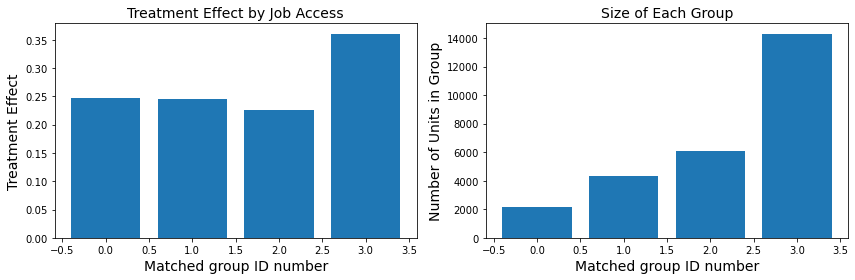

In [70]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Job Access', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE Based on Access30_Transit

In [57]:
access30_transit = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','Access30Transit_D'])]
access30_transit

,Access30Transit_D,SAP,count_enroll
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
29873,1,1,1
29874,1,0,1
29875,3,0,1
29876,4,1,1


In [64]:
model_flame_30 = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_30.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_jobaccess = model_flame_30.predict(access30_transit)


Iteration number:  1
	Number of matched groups formed in total:  4
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  0 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  26902
	Number of matches made so far:  26902
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [71]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_30.units_per_group]

[0, 1878, 129, 13]

In [72]:
# For each unit, we can see the covariates it was matched on.
model_flame_30.df_units_and_covars_matched[:15]

,Access30Transit_D
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [73]:
groups = list(range(len(model_flame_30.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_30.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_30, group[0]))
    len_group.append(len(group))

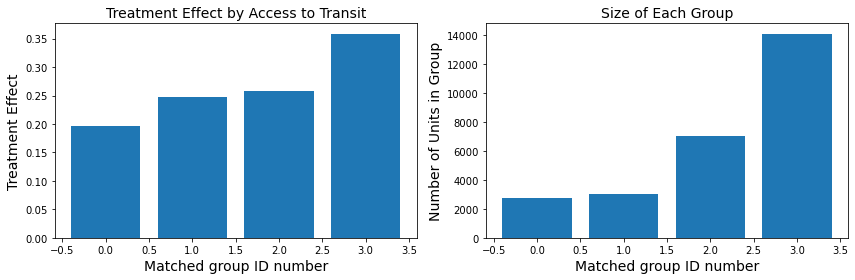

In [74]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Access to Transit', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## CATE Based on Spatial Mismatch

In [77]:
sm = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','spatialmismatch_D'])]
sm

,spatialmismatch_D,SAP,count_enroll
0,2,0,1
1,2,0,1
2,2,0,1
3,2,0,1
4,2,0,1
...,...,...,...
29873,1,1,1
29874,4,0,1
29875,4,0,1
29876,2,1,1


In [79]:
model_flame_mismatch = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_mismatch.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_mismatch = model_flame_mismatch.predict(sm)


Iteration number:  1
	Number of matched groups formed in total:  4
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  0 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  26902
	Number of matches made so far:  26902
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [81]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_mismatch.units_per_group]

[137, 0, 13, 129]

In [82]:
groups = list(range(len(model_flame_mismatch.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_mismatch.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_mismatch, group[0]))
    len_group.append(len(group))

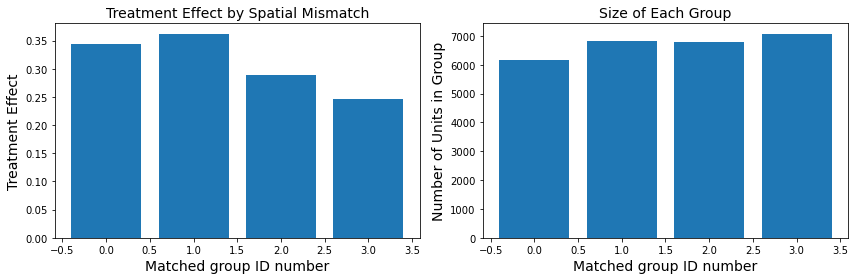

In [83]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Spatial Mismatch', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout() # Note, spatial mismatch has nothing to do with money.

## CATE Based on lowwage labor force

In [85]:
labor_force = match_all.loc[:, match_all.columns.isin(['user_id','SAP','count_enroll','spatialmismatch_D'])]
labor_force

,spatialmismatch_D,SAP,count_enroll
0,2,0,1
1,2,0,1
2,2,0,1
3,2,0,1
4,2,0,1
...,...,...,...
29873,1,1,1
29874,4,0,1
29875,4,0,1
29876,2,1,1


In [92]:
model_flame_labor = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_labor.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')

result_labor = model_flame_mismatch.predict(labor_force)


Iteration number:  1
	Number of matched groups formed in total:  4
	Unmatched treated units:  0 out of a total of  8854 treated units
	Unmatched control units:  0 out of a total of  18048 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  26902
	Number of matches made so far:  26902
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [93]:
groups = list(range(len(model_flame_mismatch.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_mismatch.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_mismatch, group[0]))
    len_group.append(len(group))

groups = list(range(len(model_flame_labor.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_labor.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_labor, group[0]))
    len_group.append(len(group))

AttributeError: 'FLAME' object has no attribute 'units_per_group'

In [ ]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Low Wage Labor Force', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [ ]:
###

In [38]:
# we will examine sales on a user_id rather than card_id level (ie. dropping the final number in the card, "stage").
sap_nostage = sap.loc[:, ~sap.columns.isin(['stage','card_id'])]
sap_nostage

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,CardIssuingAgency_HS Jail Health Services BA6586,CardIssuingAgency_HS Seattle Indian Health Board BA6516,CardIssuingAgency_KCM Promo,CardIssuingAgency_KCMCCS,CardIssuingAgency_King County Public Health,CardIssuingAgency_Promo Account,CardIssuingAgency_TRAC BA 4593,CardIssuingAgency_WithinReach,CardIssuingAgency_YWCA,CardIssuingAgency_YWCA BA2801
53,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
54,52,3/31/2022,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
55,53,10/31/2023,2021-11-17,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
75,67,8/31/2024,2021-04-20,5.303301e+11,NaN,NaN,2878,5,0,0,...,0,0,0,0,0,0,0,0,0,0
80,69,7/31/2023,2020-11-16,5.303303e+11,NaN,NaN,2898,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117711,40,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272788,2,0,0,...,0,0,0,0,0,0,0,0,0,0
117712,41,10/31/2024,2022-03-17,5.303303e+11,NaN,NaN,272790,2,0,0,...,0,0,0,0,1,0,0,0,0,0
117713,12,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272792,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
117714,23,1/31/2024,2022-03-17,5.306105e+11,NaN,NaN,272794,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
sap_nostage.drop_duplicates() # no duplicates user_id, stage 1, stage 2 
# (which makes sense because they would not have registered 2x within this period.)

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,CardIssuingAgency_HS Jail Health Services BA6586,CardIssuingAgency_HS Seattle Indian Health Board BA6516,CardIssuingAgency_KCM Promo,CardIssuingAgency_KCMCCS,CardIssuingAgency_King County Public Health,CardIssuingAgency_Promo Account,CardIssuingAgency_TRAC BA 4593,CardIssuingAgency_WithinReach,CardIssuingAgency_YWCA,CardIssuingAgency_YWCA BA2801
53,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
54,52,3/31/2022,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
55,53,10/31/2023,2021-11-17,5.303302e+11,NaN,NaN,2824,3,0,0,...,0,0,0,0,1,0,0,0,0,0
75,67,8/31/2024,2021-04-20,5.303301e+11,NaN,NaN,2878,5,0,0,...,0,0,0,0,0,0,0,0,0,0
80,69,7/31/2023,2020-11-16,5.303303e+11,NaN,NaN,2898,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117711,40,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272788,2,0,0,...,0,0,0,0,0,0,0,0,0,0
117712,41,10/31/2024,2022-03-17,5.303303e+11,NaN,NaN,272790,2,0,0,...,0,0,0,0,1,0,0,0,0,0
117713,12,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272792,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
117714,23,1/31/2024,2022-03-17,5.306105e+11,NaN,NaN,272794,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Combine the Response-variable (sales) with the features (registry).
LIFT_s = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales.csv")
LIFT_s_cont = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales_2021-11-01_to_2022-03-06.csv")

In [42]:
LIFT_s # 585230 rows (ends: 2021-10-31)

,week,Txn Desc,loadings,Amount,card_id
0,2017-03-12,Purse,2,20.0,94262-1
1,2017-04-02,Purse,1,25.0,94262-1
2,2017-08-20,Purse,1,10.0,94262-1
3,2017-11-19,Pass,1,8.0,94262-1
4,2018-01-07,Pass,1,8.0,94262-1
...,...,...,...,...,...
585225,2021-06-20,Purse,1,170.0,137082-2
585226,2021-04-04,Pass,1,54.0,249966-1
585227,2021-04-04,Pass,1,54.0,249968-1
585228,2021-05-09,Pass,1,54.0,251502-1


In [43]:
LIFT_s_cont # 27725 rows (dates: 11/1/2021 - 3/06/2022)

,week,Txn Desc,loadings,Amount,card_id
0,2021-12-12,Purse,1,5.0,18898-1
1,2021-12-19,Purse,1,7.0,18898-1
2,2021-11-14,Purse,1,20.0,97444-1
3,2021-11-21,Purse,1,20.0,97444-1
4,2021-12-05,Purse,1,20.0,97444-1
...,...,...,...,...,...
27720,2022-02-06,Pass,2,756.0,272590-1
27721,2022-02-06,Pass,2,756.0,272552-1
27722,2022-02-06,Pass,2,756.0,272596-1
27723,2022-02-27,Pass,1,54.0,110102-2


In [44]:
LIFT_s = LIFT_s.append(LIFT_s_cont, ignore_index=True) # 612955 rows

In [45]:
LIFT_s_afterp1 = LIFT_s[(LIFT_s.week >= "2020-01-01")]
LIFT_s_afterp1 # 159339 rows

,week,Txn Desc,loadings,Amount,card_id
312,2020-01-26,Purse,1,20.0,116384-1
314,2020-01-26,Purse,1,20.0,116366-1
543,2020-01-19,Purse,1,18.0,96384-1
872,2020-11-29,Purse,1,10.0,130826-1
902,2020-01-26,Purse,1,20.0,122564-2
...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590-1
612951,2022-02-06,Pass,2,756.0,272552-1
612952,2022-02-06,Pass,2,756.0,272596-1
612953,2022-02-27,Pass,1,54.0,110102-2


In [46]:
# split into user id and card number
LIFT_s_afterp1[['user_id', 'stage']] = LIFT_s_afterp1['card_id'].str.split('-', expand=True)

In [47]:
LIFT_s_afterp1

,week,Txn Desc,loadings,Amount,card_id,user_id,stage
312,2020-01-26,Purse,1,20.0,116384-1,116384,1
314,2020-01-26,Purse,1,20.0,116366-1,116366,1
543,2020-01-19,Purse,1,18.0,96384-1,96384,1
872,2020-11-29,Purse,1,10.0,130826-1,130826,1
902,2020-01-26,Purse,1,20.0,122564-2,122564,2
...,...,...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590-1,272590,1
612951,2022-02-06,Pass,2,756.0,272552-1,272552,1
612952,2022-02-06,Pass,2,756.0,272596-1,272596,1
612953,2022-02-27,Pass,1,54.0,110102-2,110102,2


In [48]:
# aggregate to the user_id level
LIFT_s_afterp1_nostage = LIFT_s_afterp1.loc[:, ~LIFT_s_afterp1.columns.isin(['stage','card_id'])]
LIFT_s_afterp1_nostage

,week,Txn Desc,loadings,Amount,user_id
312,2020-01-26,Purse,1,20.0,116384
314,2020-01-26,Purse,1,20.0,116366
543,2020-01-19,Purse,1,18.0,96384
872,2020-11-29,Purse,1,10.0,130826
902,2020-01-26,Purse,1,20.0,122564
...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590
612951,2022-02-06,Pass,2,756.0,272552
612952,2022-02-06,Pass,2,756.0,272596
612953,2022-02-27,Pass,1,54.0,110102


In [50]:
# this is registry and sales information where each row corresponds to a (user, week, Amount).
sap_TA_loadings = sap_nostage.merge(LIFT_s_afterp1_nostage, on='user_id', how='left')
sap_TA_loadings # 2567 rows

# (LATER) Bin the FIPS into 5 different regions which make sense.

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,CardIssuingAgency_King County Public Health,CardIssuingAgency_Promo Account,CardIssuingAgency_TRAC BA 4593,CardIssuingAgency_WithinReach,CardIssuingAgency_YWCA,CardIssuingAgency_YWCA BA2801,week,Txn Desc,loadings,Amount
0,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-10-11,Pass,45.0,213.75
1,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-10-18,Pass,30.0,138.75
2,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-12-13,Pass,2.0,756.00
3,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2021-11-21,Pass,2.0,756.00
4,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2021-11-21,Pass,2.0,756.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,40,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272788,2,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
33518,41,10/31/2024,2022-03-17,5.303303e+11,NaN,NaN,272790,2,0,0,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
33519,12,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272792,NaN,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
33520,23,1/31/2024,2022-03-17,5.306105e+11,NaN,NaN,272794,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [52]:
sap_TA_loadings.columns # (LATER: different demographics linked to same user_id?)

Index(['Age', 'Expiration', 'DateIssued', 'FIPS', 'Initial_Load', 'Study_Card',
       'user_id', 'Age_bin', 'RaceDesc_American Indian or Alaska Native',
       'RaceDesc_Asian', 'RaceDesc_Black or African American',
       'RaceDesc_Hispanic or Latino', 'RaceDesc_Multi-Racial',
       'RaceDesc_Native Hawaiian or Other Pacific Islander',
       'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White',
       'LanguageSpoken_Amharic', 'LanguageSpoken_Arabic',
       'LanguageSpoken_Cambodian', 'LanguageSpoken_Chinese',
       'LanguageSpoken_Dari', 'LanguageSpoken_English', 'LanguageSpoken_Farsi',
       'LanguageSpoken_French', 'LanguageSpoken_Hindi',
       'LanguageSpoken_Korean', 'LanguageSpoken_Laotian',
       'LanguageSpoken_Not Specified', 'LanguageSpoken_Oromo',
       'LanguageSpoken_Other', 'LanguageSpoken_Punjabi',
       'LanguageSpoken_Russian', 'LanguageSpoken_Samoan',
       'LanguageSpoken_Somali', 'LanguageSpoken_Spanish',
       'LanguageSpoken_Tagalog', 'Languag

<AxesSubplot:>

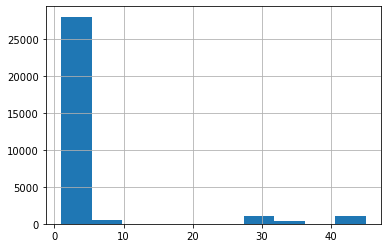

In [53]:
# loadings per week. We see outliers at 30-45
sap_TA_loadings["loadings"].hist()

<AxesSubplot:>

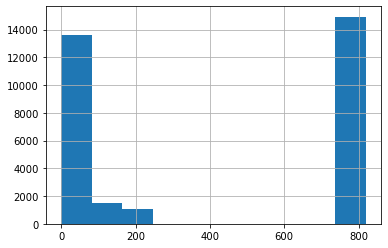

In [54]:
# distribution of Amount per week. We see outliers at 700
sap_TA_loadings["Amount"].hist()

In [55]:
# We impute a a '0' in amount for people who never purchased after phase 1.
sap_TA_loadings['loadings'] = sap_TA_loadings['loadings'].replace(np.nan, 0)
sap_TA_loadings['Amount'] = sap_TA_loadings['Amount'].replace(np.nan, 0)
sap_TA_loadings['week'] = sap_TA_loadings['week'].replace(np.nan, "Never")
sap_TA_loadings

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,CardIssuingAgency_King County Public Health,CardIssuingAgency_Promo Account,CardIssuingAgency_TRAC BA 4593,CardIssuingAgency_WithinReach,CardIssuingAgency_YWCA,CardIssuingAgency_YWCA BA2801,week,Txn Desc,loadings,Amount
0,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-10-11,Pass,45.0,213.75
1,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-10-18,Pass,30.0,138.75
2,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2020-12-13,Pass,2.0,756.00
3,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2021-11-21,Pass,2.0,756.00
4,52,10/31/2023,2020-12-09,5.303302e+11,NaN,NaN,2824,3,0,0,...,1,0,0,0,0,0,2021-11-21,Pass,2.0,756.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,40,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272788,2,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.00
33518,41,10/31/2024,2022-03-17,5.303303e+11,NaN,NaN,272790,2,0,0,...,1,0,0,0,0,0,Never,NaN,0.0,0.00
33519,12,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272792,NaN,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.00
33520,23,1/31/2024,2022-03-17,5.306105e+11,NaN,NaN,272794,0,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.00


In [56]:
sap_TA_loadings[(sap_TA_loadings.Amount == 0)] # 1160 users made 0 purchases.

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,CardIssuingAgency_King County Public Health,CardIssuingAgency_Promo Account,CardIssuingAgency_TRAC BA 4593,CardIssuingAgency_WithinReach,CardIssuingAgency_YWCA,CardIssuingAgency_YWCA BA2801,week,Txn Desc,loadings,Amount
55,31,9/30/2024,2021-07-08,5.303301e+11,NaN,NaN,3046,1,0,0,...,1,0,0,0,0,0,Never,NaN,0.0,0.0
113,32,7/31/2024,2021-07-29,5.303301e+11,NaN,NaN,3280,1,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0
182,33,7/31/2024,2021-08-20,5.303301e+11,NaN,NaN,4266,1,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0
266,67,10/31/2024,2022-03-07,5.303303e+11,NaN,NaN,5176,5,0,1,...,1,0,0,0,0,0,Never,NaN,0.0,0.0
296,44,10/31/2024,2021-10-14,5.303302e+11,NaN,NaN,5488,2,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,40,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272788,2,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0
33518,41,10/31/2024,2022-03-17,5.303303e+11,NaN,NaN,272790,2,0,0,...,1,0,0,0,0,0,Never,NaN,0.0,0.0
33519,12,1/31/2024,2022-03-17,5.303301e+11,NaN,NaN,272792,NaN,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0
33520,23,1/31/2024,2022-03-17,5.306105e+11,NaN,NaN,272794,0,0,0,...,0,0,0,0,0,0,Never,NaN,0.0,0.0


In [57]:
# 1397 unique user_ids in the df.
len(sap_TA_loadings["user_id"].unique())

8753

In [157]:
# aggregate by user-id (1397 unique user_ids, summing amount)
total_amount = phase1_TA_loadings.groupby('user_id').agg({'Amount': ['sum']}) # 1397 rows
total_amount # the total amount column is the amount for each user_id (summed over all cards and purchases.)

,Amount
,sum
user_id,
100170,0.0
10168,2558.0
102816,0.0
103558,0.0
103688,0.0
...,...
96912,220.0
96928,0.0


In [158]:
phase1_TA_agg = phase1_TA_loadings.merge(total_amount, on='user_id', how='left')
phase1_TA_agg # 2567 rows

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,week,Txn Desc,loadings,Amount,"(Amount, sum)"
0,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,1,Never,NaN,0.0,0.00,0.0
1,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,1,0,Never,NaN,0.0,0.00,0.0
2,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2020-10-11,Pass,45.0,213.75,2626.5
3,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2020-10-18,Pass,30.0,138.75,2626.5
4,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2021-02-07,Pass,2.0,756.00,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564,2,0,1,...,0,0,0,0,1,2021-04-18,Purse,1.0,20.00,65.0
2563,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568,2,0,0,...,0,0,0,1,0,2020-07-19,Purse,1.0,10.00,10.0
2564,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572,1,0,0,...,0,0,0,1,0,2020-03-22,Purse,1.0,50.00,50.0
2565,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584,4,0,0,...,0,0,0,0,1,Never,NaN,0.0,0.00,0.0


In [159]:
phase1_TA_agg['Amount','sum']
phase1_TA_agg = phase1_TA_agg.rename(columns = {('Amount','sum'): 'amt_total'})

In [161]:
# categ is a df containing only the categorical variables and response variable amt_total in phase1_TA_agg.
categ = phase1_TA_agg.loc[:, ~phase1_TA_agg.columns.isin(['Age', 'FIPS', 'Expiration', 'DateIssued', 'week','Txn Desc', 'loadings', 'Initial_Load', "Amount"])]
categ # 2567 rows

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
3,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
4,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [162]:
# For matching, each unit will be one of the 1397 unique user_ids. The response will be the total amount they spent after 1/1/2020.
ds_general = categ.drop_duplicates() # drop columns that are for the same user id. We have aggregated their spendings in amt_total already.
ds_general # 1397 rows

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [163]:
ds_general[(ds_general.amt_total != 0)] #  LIFT_reg[(LIFT_reg.Study_Card != "Subsidized Annual Pass") 

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
31,0,10878,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,896.0
36,1,12408,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,201560,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.0
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0


In [164]:
# why is it that most users who registered during phase 1 (3-7/2019) did not purchase at all after (1/2020)? Is this true?
ds_general['amt_total'].value_counts().head(20)

0.0       1159
20.0        21
10.0        15
40.0        14
756.0       10
50.0         7
25.0         5
30.0         5
54.0         5
46.0         4
776.0        4
1532.0       4
220.0        3
192.0        3
162.0        3
1108.5       3
110.0        2
150.0        2
105.0        2
15.0         2
Name: amt_total, dtype: int64

<AxesSubplot:>

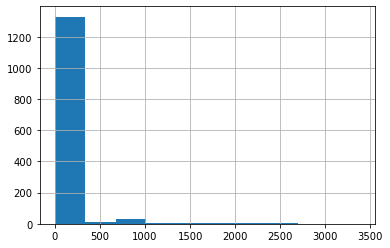

In [165]:
# distribution of total_amt by user after 1/1/20.
ds_general["amt_total"].hist()

In [166]:
# 82% of users in phase 1 did not purchase sales 01/01/2020
print(1159/1397)
print(237/1397)

0.8296349319971367
0.16964924838940587


### Demographics of those who did make sales purchases (long term use of ORCA LIFT).

In [168]:
ds_general

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [169]:
made_purchases =  ds_general[(ds_general.amt_total != 0)]
made_no_purchase = ds_general[(ds_general.amt_total == 0)]
made_purchases

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
31,0,10878,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,896.0
36,1,12408,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,201560,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.0
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0


<AxesSubplot:>

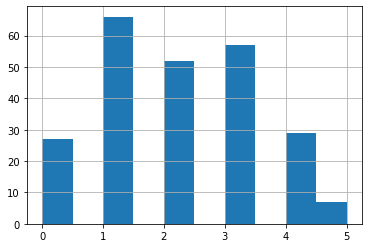

In [170]:
made_purchases["Age_bin"].hist()

<AxesSubplot:>

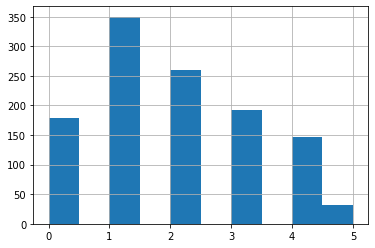

In [171]:
made_no_purchase["Age_bin"].hist()

In [174]:
# reverse 1-hot encoding of race (https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas)

s = made_purchases.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_purchases["Race_desc"] = pd.get_dummies(s, prefix='RaceDesc').idxmax(1) # is counting everyone who does not fit into a category as Native American.

t = made_purchases.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_purchases["Agency"] = pd.get_dummies(t, prefix='Agency').idxmax(1)
made_purchases

u = made_no_purchase.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_no_purchase["Race_desc"] = pd.get_dummies(u, prefix='RaceDesc').idxmax(1)

v = made_no_purchase.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_no_purchase["Agency"] = pd.get_dummies(v, prefix='Agency').idxmax(1)
made_no_purchase

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total,Race_desc,Agency
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_American Indian or Alaska Native,CardIssuingAgency_CSO White Center
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_White,CardIssuingAgency_CSO Capitol Hill
33,0,10908,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Not Specified,CardIssuingAgency_CSO Capitol Hill
34,1,11950,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Black or African American,CardIssuingAgency_CSO Capitol Hill
35,0,11982,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Not Specified,CardIssuingAgency_CSO Capitol Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,0,201496,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2555,0,201518,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2556,0,201534,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2557,0,201550,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

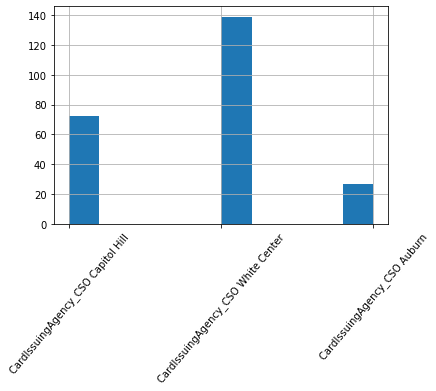

In [175]:
# eda shows no drastic correlations beteween long term enrollment and agency. 
made_purchases["Agency"].hist()
plt.xticks(rotation=50)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

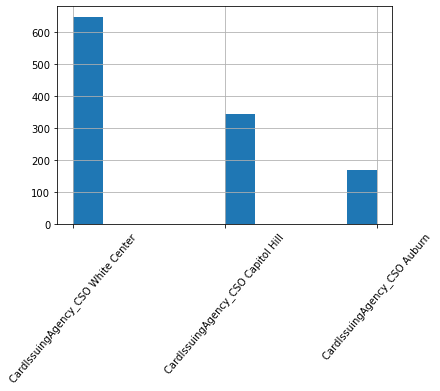

In [176]:
made_no_purchase["Agency"].hist()
plt.xticks(rotation=50)

In [177]:
# seems to be no drastic differences between long term enrollment based on race.
made_purchases["Race_desc"].value_counts()

RaceDesc_White                                        107
RaceDesc_Black or African American                     79
RaceDesc_Hispanic or Latino                            15
RaceDesc_Asian                                         15
RaceDesc_Not Specified                                  7
RaceDesc_None                                           5
RaceDesc_Native Hawaiian or Other Pacific Islander      4
RaceDesc_Other                                          3
RaceDesc_Multi-Racial                                   2
RaceDesc_American Indian or Alaska Native               1
Name: Race_desc, dtype: int64

In [183]:
# white population (purchased/no_purchase)
print(107/452)
# hispanic population (purchased/no_purchase)
print(15/85)

0.23672566371681417
0.17647058823529413


In [178]:
made_no_purchase["Race_desc"].value_counts()

RaceDesc_White                                        452
RaceDesc_Black or African American                    381
RaceDesc_Hispanic or Latino                            85
RaceDesc_Asian                                         50
RaceDesc_Other                                         47
RaceDesc_Not Specified                                 46
RaceDesc_Native Hawaiian or Other Pacific Islander     30
RaceDesc_Multi-Racial                                  29
RaceDesc_None                                          27
RaceDesc_American Indian or Alaska Native              12
Name: Race_desc, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

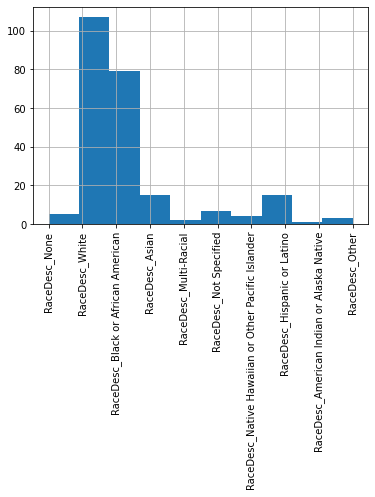

In [182]:
made_purchases["Race_desc"].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

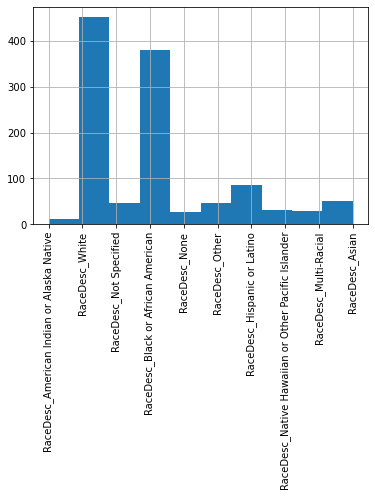

In [181]:
made_no_purchase["Race_desc"].hist()
plt.xticks(rotation=90)

In [61]:
# drop user_id for input to FLAME
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native_x,RaceDesc_Asian_x,RaceDesc_Black or African American_x,RaceDesc_Hispanic or Latino_x,RaceDesc_Multi-Racial_x,RaceDesc_Native Hawaiian or Other Pacific Islander_x,RaceDesc_Not Specified_x,RaceDesc_Other_x,...,LanguageSpoken_Russian_y,LanguageSpoken_Somali_y,LanguageSpoken_Spanish_y,LanguageSpoken_Tagalog_y,LanguageSpoken_Tigrinya_y,LanguageSpoken_Vietnamese_y,CardIssuingAgency_CSO Auburn_y,CardIssuingAgency_CSO Capitol Hill_y,CardIssuingAgency_CSO White Center_y,amt_total
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [188]:
# drop user_id for matching.
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [189]:
# flame is faster but dame considers more covariate sets.
model_flame_AMT = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, adaptive_weights='ridge', alpha=0.1, want_pe=True)

# repeats = True allows units to be placed in >1 matched group
# verbose = 3 Prints matching information for each iteration
# adaptive_weights='ridge' The ML algorithm used to decide which covariate should be dropped next.
# want_pe = TRUE If true, the output of the algorithm will include the predictive error (predicting the response) of the covariate sets used for matching in each iteration.

In [190]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_flame_AMT = model_flame_AMT.predict(ds_general) # perform the match on the input data

# holdout_data=False The holdout data is equal to the entire input data.

Iteration number:  1
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units:  272 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  1118
	Number of matches made so far:  1118
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units:  272 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  134454.88321927
	Number of matches made in this iteration:  0
	Number of matches made so far:  1118
	In this iteration, the covariates dropped are:  LanguageSpoken_Not Specified
Iteration number:  3
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units: 

Iteration number:  21
	Number of matched groups formed in total:  116
	Unmatched treated units:  1 out of a total of  186 treated units
	Unmatched control units:  85 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  135029.40365085407
	Number of matches made in this iteration:  193
	Number of matches made so far:  1311
	In this iteration, the covariates dropped are:  LanguageSpoken_Spanish
Iteration number:  22
	Number of matched groups formed in total:  128
	Unmatched treated units:  1 out of a total of  186 treated units
	Unmatched control units:  33 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  135294.28226665873
	Number of matches made in this iteration:  245
	Number of matches made so far:  1363
	In this iteration, the covariates dropped are:  RaceDesc_Not Specified
Iteration number:  23
	Number of matched groups formed in total:  131
	Unmatched treated units:  0 out of a total of  186 trea

Least to Most important variables
1. Language spoken
2. Race
3. Card Issuing Agency
4. Age

In [191]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

-17.257329294773545

In [192]:
# For each unit, we can see the covariates it was matched on.
model_flame_AMT.df_units_and_covars_matched[:30]

,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
2,3,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31,3,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
33,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Matching on Race.

In [207]:
phase1_TA_agg.columns

Index(['Age', 'Expiration', 'DateIssued', 'FIPS', 'Initial_Load', 'Study_Card',
       'user_id', 'Age_bin', 'RaceDesc_American Indian or Alaska Native',
       'RaceDesc_Asian', 'RaceDesc_Black or African American',
       'RaceDesc_Hispanic or Latino', 'RaceDesc_Multi-Racial',
       'RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None',
       'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White',
       'LanguageSpoken_Chinese', 'LanguageSpoken_Dari',
       'LanguageSpoken_English', 'LanguageSpoken_Korean',
       'LanguageSpoken_Not Specified', 'LanguageSpoken_Oromo',
       'LanguageSpoken_Other', 'LanguageSpoken_Russian',
       'LanguageSpoken_Somali', 'LanguageSpoken_Spanish',
       'LanguageSpoken_Tagalog', 'LanguageSpoken_Tigrinya',
       'LanguageSpoken_Vietnamese', 'CardIssuingAgency_CSO Auburn',
       'CardIssuingAgency_CSO Capitol Hill',
       'CardIssuingAgency_CSO White Center', 'week', 'Txn Desc', 'loadings',
       'Amount', 'amt_total'],


In [208]:
race = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['user_id','Study_Card','amt_total','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race

,Study_Card,user_id,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,3228,1,0,0,0,0,0,0,0,0,0,0.0
1,1,3970,0,0,0,0,0,0,0,0,0,1,0.0
2,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,201564,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,201568,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,201572,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,201584,0,0,0,0,0,0,0,0,0,1,0.0


In [209]:
race[2:8] # rows 2:8 correspond to purchases made by the same user.

,Study_Card,user_id,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
2,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
5,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
6,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
7,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5


In [210]:
race = race.drop_duplicates() # 1397 rows. drop columns that are for the same user id. We have aggregated in amt_total already.

In [211]:
# drop user_id for matching.
race = race.loc[:, ~race.columns.isin(['user_id'])]
race

,Study_Card,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,1,0,0,0,0,0,0,0,0,0,0.0
1,1,0,0,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,1,0,0,0,2626.5
8,0,0,0,0,0,0,0,0,0,0,1,597.0
22,0,0,0,1,0,0,0,0,0,0,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,0,0,0,0,0,0,0,0,0,1,0.0


In [212]:
model_flame_race = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_race.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race = model_flame_race.predict(race)

Iteration number:  1
	Number of matched groups formed in total:  10
	Unmatched treated units:  0 out of a total of  186 treated units
	Unmatched control units:  0 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  1397
	Number of matches made so far:  1397
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [213]:
# For each unit, we can see the covariates it was matched on.
model_flame_race.df_units_and_covars_matched[:10]

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1
22,0,0,1,0,0,0,0,0,0,0
31,0,1,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,1,0,0
34,0,0,1,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,1,0,0
36,0,0,1,0,0,0,0,0,0,0


In [215]:
groups = list(range(len(model_flame_race.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race, group[0]))
    len_group.append(len(group))

In [216]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_race.units_per_group]

[0, 31, 22, 45, 93, 154, 2, 33, 43, 1]

In [221]:
mmg2 = dame_flame.utils.post_processing.MG(model_flame_race, unit_ids =0) # main matched group for unit k.
mmg2

,Study_Card,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,1,0,0,0,0,0,0,0,0,0,0.0
279,0,1,0,0,0,0,0,0,0,0,0,0.0
352,0,1,0,0,0,0,0,0,0,0,0,0.0
534,0,1,0,0,0,0,0,0,0,0,0,0.0
814,1,1,0,0,0,0,0,0,0,0,0,0.0
931,1,1,0,0,0,0,0,0,0,0,0,776.0
933,1,1,0,0,0,0,0,0,0,0,0,0.0
1221,0,1,0,0,0,0,0,0,0,0,0,0.0
1224,0,1,0,0,0,0,0,0,0,0,0,0.0
1314,0,1,0,0,0,0,0,0,0,0,0,0.0


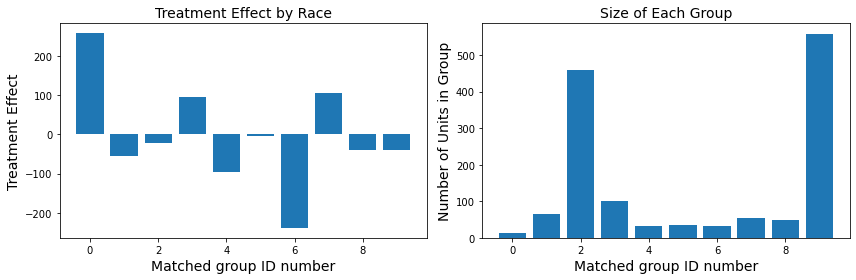

In [222]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

1. RaceDesc_American Indian or Alaska Native -
2. RaceDesc_Asian	
3. RaceDesc_Black or African American	
4. RaceDesc_Hispanic or Latino	-
5. RaceDesc_Multi-Racial	
6. RaceDesc_Native Hawaiian or Other Pacific Islander	
7. RaceDesc_None
8. RaceDesc_Not Specified -
9. RaceDesc_Other	
10. RaceDesc_White


In [225]:
# Counts of races in treatment group

tt_race = race[(race.Study_Card != 0)]
print(tt_race["RaceDesc_Asian"].value_counts()) # 7 asian individuals who received treatment (after aggregating units to the individual, rather than a sales transaction.)
print(tt_race["RaceDesc_Hispanic or Latino"].value_counts()) # 11 
print(tt_race["RaceDesc_American Indian or Alaska Native"].value_counts()) # 4
tt_race["RaceDesc_Black or African American"].value_counts() # 126
print(tt_race["RaceDesc_White"].value_counts()) # 81
print(tt_race["RaceDesc_Not Specified"].value_counts()) # 4

0    179
1      7
Name: RaceDesc_Asian, dtype: int64
0    175
1     11
Name: RaceDesc_Hispanic or Latino, dtype: int64
0    183
1      3
Name: RaceDesc_American Indian or Alaska Native, dtype: int64
0    105
1     81
Name: RaceDesc_White, dtype: int64
0    183
1      3
Name: RaceDesc_Not Specified, dtype: int64


In [226]:
# differential CA treatment effects
cate_NativeAm = dame_flame.utils.post_processing.CATE(model_flame_race, 0)
print(cate_NativeAm) # nrow - 11 (4 in treatment)

cate_Asian = dame_flame.utils.post_processing.CATE(model_flame_race, 31)
print(cate_Asian) # nrow 143 (8 in treatment)

cate_AA = dame_flame.utils.post_processing.CATE(model_flame_race, 22)
print(cate_AA) # 1004 (126 in treatment)

cate_Hisp = dame_flame.utils.post_processing.CATE(model_flame_race, 45)
print(cate_Hisp) # nrow = 226 (45 in treatment)

cate_Hw = dame_flame.utils.post_processing.CATE(model_flame_race, 154)
print(cate_Hw) # nrow = 226 (45 in treatment)

cate_White = dame_flame.utils.post_processing.CATE(model_flame_race, 1)
print(cate_White) # nrow 1222 (126 in treatment)

258.6666666666667
-54.20566502463054
-22.849814024261384
95.74412665985699
-4.362500000000001
-40.04565705873237


## Matching on Agency

In [242]:
agency = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','CardIssuingAgency_CSO Auburn', 'CardIssuingAgency_CSO Capitol Hill', 'CardIssuingAgency_CSO White Center'])]
agency

,Study_Card,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,0,0,1,0.0
1,1,0,1,0,0.0
2,0,0,1,0,2626.5
3,0,0,1,0,2626.5
4,0,0,1,0,2626.5
...,...,...,...,...,...
2562,0,0,0,1,65.0
2563,0,0,1,0,10.0
2564,0,0,1,0,50.0
2565,0,0,0,1,0.0


In [228]:
# Matching on agency.
model_flame_agency = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agency.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agency = model_flame_agency.predict(agency)

Iteration number:  1
	Number of matched groups formed in total:  3
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  0 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2567
	Number of matches made so far:  2567
	In this iteration, the covariates dropped are:  set()
2567 units matched. We finished with no more treated units to match


In [229]:
mmg3 = dame_flame.utils.post_processing.MG(model_flame_agency, unit_ids =0) # main matched group for unit k.
mmg3

,Study_Card,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,0,0,1,0.0
8,0,0,0,1,597.0
9,0,0,0,1,597.0
10,0,0,0,1,597.0
11,0,0,0,1,597.0
...,...,...,...,...,...
2560,0,0,0,1,65.0
2561,0,0,0,1,65.0
2562,0,0,0,1,65.0
2565,0,0,0,1,0.0


In [230]:
# For each unit, we can see the covariates it was matched on.
model_flame_agency.df_units_and_covars_matched[:100]

,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
95,0,1,0
96,0,0,1
97,0,1,0
98,0,1,0


In [234]:
# differential CA treatment effects
cate_CH = dame_flame.utils.post_processing.CATE(model_flame_agency, 1)
print(cate_CH) # North

cate_WC = dame_flame.utils.post_processing.CATE(model_flame_agency, 0)
print(cate_WC)

cate_Auburn = dame_flame.utils.post_processing.CATE(model_flame_agency, 9)
print(cate_Auburn) # Auburn is the southmost among the three: https://en.wikipedia.org/wiki/Auburn,_Washington)

-181.9587793159222
-109.70522117631921
-109.70522117631921


In [235]:
# Number of auburn in treatment group
# larger group size correlate to smaller treatment effect.
tt_a = agency[(agency.Study_Card != 0)]
tt_a["CardIssuingAgency_CSO Auburn"].value_counts() # 97 (March 29th: 67)

0    215
1     68
Name: CardIssuingAgency_CSO Auburn, dtype: int64

In [236]:
groups = list(range(len(model_flame_agency.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agency.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agency, group[0]))
    len_group.append(len(group))

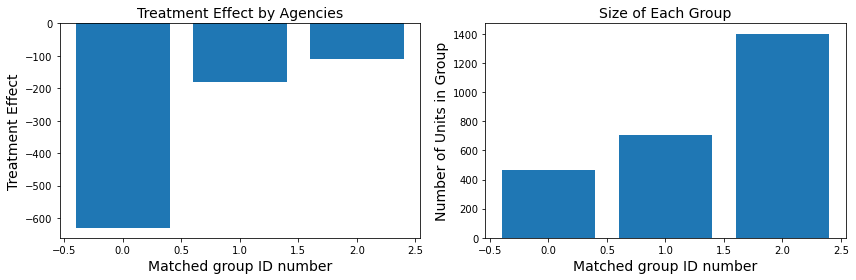

In [237]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Agencies', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## Matching on Age Category

In [243]:
age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin'])]
age

,Study_Card,Age_bin,amt_total
0,0,3,0.0
1,1,5,0.0
2,0,3,2626.5
3,0,3,2626.5
4,0,3,2626.5
...,...,...,...
2562,0,2,65.0
2563,0,2,10.0
2564,0,1,50.0
2565,0,4,0.0


In [244]:
model_flame_agebin = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agebin.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agebin = model_flame_agebin.predict(age)

Iteration number:  1
	Number of matched groups formed in total:  6
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  0 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2567
	Number of matches made so far:  2567
	In this iteration, the covariates dropped are:  set()
2567 units matched. We finished with no more treated units to match


In [180]:
# For each unit, we can see the covariates it was matched on.
# model_flame_agebin.df_units_and_covars_matched[50:60]

In [245]:
groups = list(range(len(model_flame_agebin.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agebin.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agebin, group[0]))
    len_group.append(len(group))

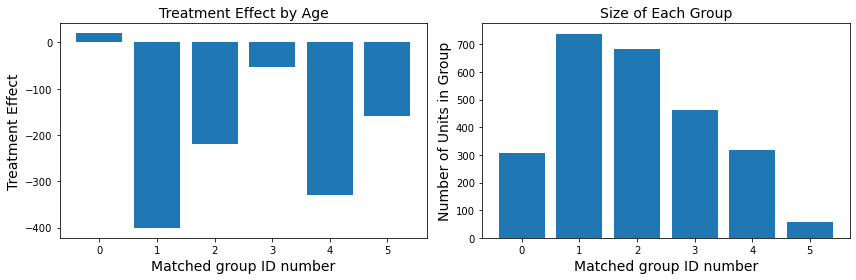

In [246]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [267]:
cate_0 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 125)
print(cate_0) # 18-25
cate_1 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 70)
print(cate_1) # 25-35
cate_2 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 79)
print(cate_2)
cate_3 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(cate_3)
cate_4 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 8)
print(cate_4)
cate_5 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(cate_5) # >65

20.171861595653425
-400.89417598049175
-218.90090993046496
-51.93333333333334
-329.9946383568548
-157.76415094339623


In [268]:
# For each unit, we can see the covariates it was matched on.
model_flame_agebin.df_units_and_covars_matched[100:110]

,Age_bin
100,2
101,4
102,1
103,2
104,2
105,2
106,2
107,2
108,2
109,2


## Matching on Race + AgeBin

In [271]:
race_age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race_age


,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,3,1,0,0,0,0,0,0,0,0,0,0.0
1,1,5,0,0,0,0,0,0,0,0,0,1,0.0
2,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,2,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,2,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,1,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,4,0,0,0,0,0,0,0,0,0,1,0.0


In [272]:
model_flame_race_age = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_race_age.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race_age = model_flame_race_age.predict(race_age)


Iteration number:  1
	Number of matched groups formed in total:  38
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  131 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2436
	Number of matches made so far:  2436
	In this iteration, the covariates dropped are:  set()
2436 units matched. We finished with no more treated units to match


In [317]:
# For each unit, we can see the covariates it was matched on.
model_flame_race_age.df_units_and_covars_matched[:46]

,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White
0,3,1,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,1
8,4,0,0,0,0,0,0,0,0,0,1
9,4,0,0,0,0,0,0,0,0,0,1
10,4,0,0,0,0,0,0,0,0,0,1
11,4,0,0,0,0,0,0,0,0,0,1
12,4,0,0,0,0,0,0,0,0,0,1
13,4,0,0,0,0,0,0,0,0,0,1
14,4,0,0,0,0,0,0,0,0,0,1
15,4,0,0,0,0,0,0,0,0,0,1


In [277]:
groups = list(range(len(model_flame_race_age.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race_age.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race_age, group[0]))
    len_group.append(len(group))

In [299]:
# model_flame_race.units_per_group
# insight into match groups below

print([g[0] for g in model_flame_race_age.units_per_group])

[228, 426, 329, 154, 384, 128, 534, 303, 34, 45, 93, 347, 43, 89, 419, 53, 289, 984, 942, 71, 33, 341, 44, 0, 31, 36, 521, 201, 200, 38, 763, 22, 278, 336, 8, 258, 710, 1]


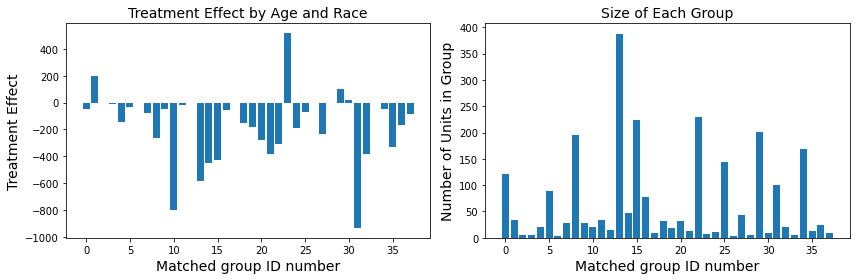

In [279]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age and Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [305]:
group_indices = [g[0] for g in model_flame_race_age.units_per_group]
print(group_indices)
print(cate_of_group)

[228, 426, 329, 154, 384, 128, 534, 303, 34, 45, 93, 347, 43, 89, 419, 53, 289, 984, 942, 71, 33, 341, 44, 0, 31, 36, 521, 201, 200, 38, 763, 22, 278, 336, 8, 258, 710, 1]
[-49.20175438596491, 195.74615384615385, 0.0, -8.0, -140.8421052631579, -34.636073059360726, 0.0, -76.81481481481481, -264.3904761904762, -48.42857142857143, -798.5263157894736, -21.066666666666677, -4.153846153846154, -587.0042782394584, -452.8723404255319, -429.58878504672896, -54.303571428571445, 0.0, -154.58333333333334, -182.05882352941177, -279.1, -379.5, -304.5889652014652, 517.3333333333334, -188.2, -68.65560775102759, 0.0, -233.83333333333337, 0.0, 100.82928388746808, 20.0, -934.3319327731092, -380.0, 0.0, -46.120128205128196, -333.375, -164.5909090909091, -82.22222222222223]


In [315]:
print(cate_of_group[23])
print(group_indices[23])

517.3333333333334
0


In [307]:
print(model_flame_race_age.df_units_and_covars_matched.iloc[426])
print(model_flame_race_age.df_units_and_covars_matched.iloc[0])

Age_bin                                               0
RaceDesc_American Indian or Alaska Native             0
RaceDesc_Asian                                        0
RaceDesc_Black or African American                    0
RaceDesc_Hispanic or Latino                           0
RaceDesc_Multi-Racial                                 0
RaceDesc_Native Hawaiian or Other Pacific Islander    0
RaceDesc_None                                         0
RaceDesc_Not Specified                                0
RaceDesc_Other                                        0
RaceDesc_White                                        1
Name: 489, dtype: object
Age_bin                                               3
RaceDesc_American Indian or Alaska Native             1
RaceDesc_Asian                                        0
RaceDesc_Black or African American                    0
RaceDesc_Hispanic or Latino                           0
RaceDesc_Multi-Racial                                 0
RaceDesc_Native Hawaiia

In [316]:
# age bin 5 + White
white_old = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(white_old)
white_0  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 426)
print(white_0)
# age bin 0 + Hispanic/Latino
hispanic_1  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 45)
print(hispanic_1)
# age bin 3 + Native American
Native_3  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(Native_3)

-157.76415094339623
20.171861595653425
-400.89417598049175
-51.93333333333334


Comments: In this analysis, earch unit is a sales purchase. What I could do, is aggregate by card_id s.t. each unit is an individual. (aggregating by person: histogram of number of purchases per individual.)

In [ ]:
# look at the young, white population.
# age distribution: hispanic population.
# look into location + age. (agency + age)

# make graph: income by age category.
# is average sales different between different stages.